In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

pclass： 旅客クラス（1＝1等、2＝2等、3＝3等）。裕福さの目安となる \
name： 乗客の名前 \
sex： 性別（male＝男性、female＝女性）\
age： 年齢。一部の乳児は小数値 \
sibsp： タイタニック号に同乗している兄弟（Siblings）や配偶者（Spouses）の数 \
parch： タイタニック号に同乗している親（Parents）や子供（Children）の数 \
ticket： チケット番号 \
fare： 旅客運賃 \
cabin： 客室番号 \
embarked： 出港地（C＝Cherbourg：シェルブール、Q＝Queenstown：クイーンズタウン、S＝Southampton：サウサンプトン）\
boat： 救命ボート番号 \
body： 遺体収容時の識別番号 \
home.dest： 自宅または目的地 \
survived：生存状況（0＝死亡、1＝生存）。通常はこの数値が目的変数として使われる

In [427]:
#学習用とテスト用のデータをまず読み込む
train_df=pd.read_csv("./drive/MyDrive/titanic/data/train.csv")
test_df=pd.read_csv("./drive/MyDrive/titanic/data/test.csv")

In [206]:
#学習用データの中身の確認
#すべてデータを確認するのもいいが、まずは絞り込んだ方がとっつきやすいように思う
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr,Karl Howell


In [8]:
#テストデータの中身の確認
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
#データのサイズ
#テスト用データでは、生存者に関するカラムが存在しない。
train_df.shape,test_df.shape

((891, 12), (418, 11))

In [11]:
#データの型
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#学習用データ欠損値の確認
#AgeとCabin、Embarkedで欠損値が確認できる。
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#テストデータ欠損値の確認
#AgeとCabin、Fareで欠損値が確認できる。
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
#データの基本的特徴量の確認
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#探索的データ分析

In [16]:
#男女数
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
#男女比の算出
male=train_df["Sex"][train_df["Sex"]=="male"].count()
female=train_df["Sex"][train_df["Sex"]=="female"].count()
r_result=male/female
round(r_result,3)

1.838

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")#書式設定

In [29]:
#一部のデータの抽出(891行)
#今回は、"Embarked"に欠損値が存在している。欠損値が存在するのは、2行のみなので、とりあえず、切り落とす。
#今回、データを切り落とすが、切り落とすことができているかを確認は一応しておく。
train_df[["Embarked","Survived","PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [30]:
#dropによって切り落とす
data1_df=train_df[["Embarked","Survived","PassengerId"]].dropna()

In [31]:
data1_df

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


891件⇒889件となり、問題なく二行分だけがdropされている。

In [32]:
#Embarked、Survived別に件数を確認する。
data1_post=data1_df.groupby(["Embarked","Survived"]).count().unstack()
data1_post

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

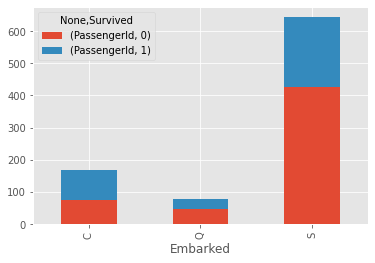

In [33]:
#可視化する。
data1_post.plot.bar(stacked=True)

Cは半数以上が生存し、QとSは半数以上が死亡している。また、Sの死亡数が群を抜いている。\
このことから、どうやら、生存者と出港場所と関連がある可能性がある。

In [34]:
#性別、クラスによって、生存者数を確認する。
data2_df=train_df[["Pclass","Sex","Survived","PassengerId"]]

In [35]:
data2_post=data2_df.groupby(["Pclass","Sex","Survived"]).count().unstack()
data2_post

PassengerId    
Survived                0   1
Pclass Sex                   
1      female           3  91
       male            77  45
2      female           6  70
       male            91  17
3      female          72  72
       male           300  47

In [36]:
data2_post["suvive_rate"]=data2_post.iloc[:,1]/(data2_post.iloc[:,0]+data2_post.iloc[:,1])
data2_post

PassengerId     suvive_rate
Survived                0   1            
Pclass Sex                               
1      female           3  91    0.968085
       male            77  45    0.368852
2      female           6  70    0.921053
       male            91  17    0.157407
3      female          72  72    0.500000
       male           300  47    0.135447

明らかに相対的に男性よりも、女性の方が生存数が多い。 \
しかし、クラス3の女性はほかのクラスとはと異なり、死亡数と生存数が同じである。\
また、クラス1,2に比べて、クラス3の死亡者が多いことがわかる。 \
クラス３の部屋（階級の低い部屋）の男性の死亡するが300人ととても多いことがわかる。 \
つまり、優先的に女性でかつ階級の高い方々をボートに乗せた可能性がある。


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


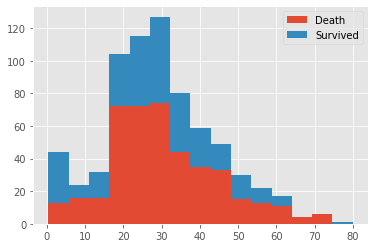

In [48]:
#年齢ごとの死亡者割合
plt.hist((train_df[train_df["Survived"]==0]["Age"].values,train_df[train_df["Survived"]==1]["Age"].values),
       histtype="barstacked",bins=15,label=("Death","Survived"))
plt.legend()

0歳から10歳の年代を除いて、生存者より、死亡者の割合が高い。つまり、年少者の子供は優先的にボートに乗せられた可能性がある。

In [49]:
train_df_corr=pd.get_dummies(train_df,columns=["Sex"],drop_first=True)
train_df_corr=pd.get_dummies(train_df_corr,columns=["Embarked"])
train_df_corr

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


機械学習では、文字ではなく、数値しか扱うことができない。現状だと"SEX"と"Embarked"は数値でないため扱いにくい。そこで、有限なカテゴリについては、ダミー変数を使うことができる。One-Hot化によって、該当するもののみを1とし、それ以外を0とすることができる。

#相関係数の確認

In [125]:
train_corr=train_df_corr.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


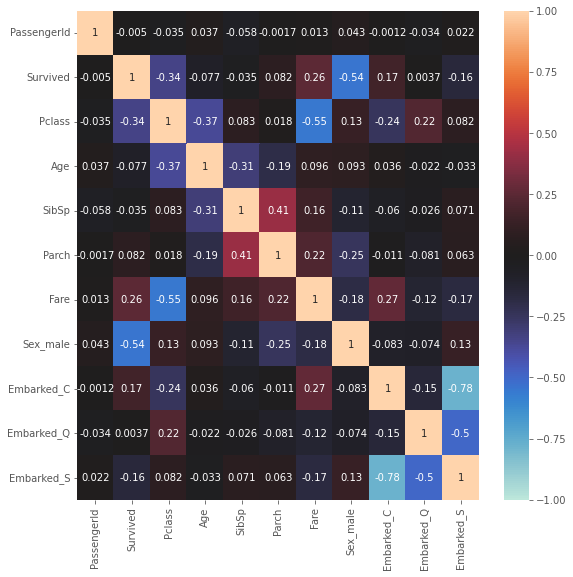

In [126]:
#数値のみではわかりにくいのでヒートマップによる可視化
#1に近づくほど正に相関、-1に近づくほど負に相関する。
plt.figure(figsize=(9,9))
sns.heatmap(train_corr,vmax=1,vmin=-1,center=0,annot=True)

#生存と関係がある可能性が高い順に、性別(Sex)・階級部屋（Pclass)・乗船料(Fare)である。
つまり、相関関係として
➀女性であると生存の可能性が高くなる。
➁階級数が低いほど、生存する可能性が高くなる。
➂乗船料が高いほど、生存する可能性が高くなる。

#前処理(テストデータと学習データの連結)


In [428]:
#テストデータと学習データの結合(データは基本時に分散⇒集中させる)
all_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [429]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#前処理（料金）

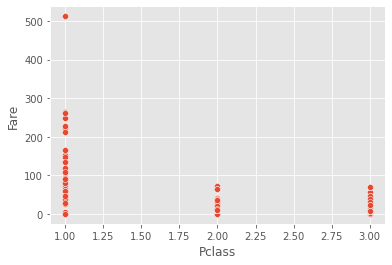

In [430]:
#CRIMとtarget(住宅価格)の散布図
#Pclass1（最高級)のところに、外れ値が確認できる。
sns.scatterplot(x="Pclass", y="Fare", data=all_df)

In [431]:
#超高級料金については4件存在し、全部同一金額であることがわかる。
#今回は除外対象外とする。
all_df[all_df["Fare"]>=500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [432]:
#欠損値がFareで見られるのでPclassごとのFareの平均値で欠損値で埋め合わせる
#PclassとFareについては、相関がありそうである。つまり、クラスが小さいほど、料金が高い。
Fare_mean=all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()
Fare_mean.columns=["Pclass","Fare_mean"]#列名の変更
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [433]:
#Pclassを条件として、all_dfに対してFare_meanを左外部結合を実施する。
#mergeするときは注意すること。修正などで不用意にmerge処理を含んだセルを何度も実行してしまうとどんどんとカラムが追加されてしまう。
all_df=pd.merge(all_df,Fare_mean,on="Pclass",how="left")
#loc→行列番号　iloc→行列名による指定
#nullのところだけ、補間処理を行う。
all_df.loc[(all_df["Fare"].isnull()),"Fare"]=all_df["Fare_mean"]
#余分に結合しているFare_meanを除去する。
all_df=all_df.drop("Fare_mean",axis=1)#axis=0は縦方向　axis=1は横方向
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [434]:
#問題なく、Fareの欠損値は除去されている。
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

#前処理（性別)

In [435]:
#名前の加工→Allen, Mr. William Henry	→苗字・敬称・名前
#splitが妥当
name_df=all_df["Name"].str.split("[,.]",2,expand=True)
name_df

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [436]:
#カラム名の変更(苗字、敬称、名)
name_df.columns=["family_name","honorific","name"]
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [437]:
#空白の除去
name_df["family_name"]=name_df["family_name"].str.strip()
name_df["honorific"]=name_df["honorific"].str.strip()
name_df["name"]=name_df["name"].str.strip()
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [438]:
#敬称に着目してAgeをうめあわせる。
#敬称ごとのカウント数
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

In [439]:
#結合
all_df=pd.concat([all_df,name_df],axis=1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


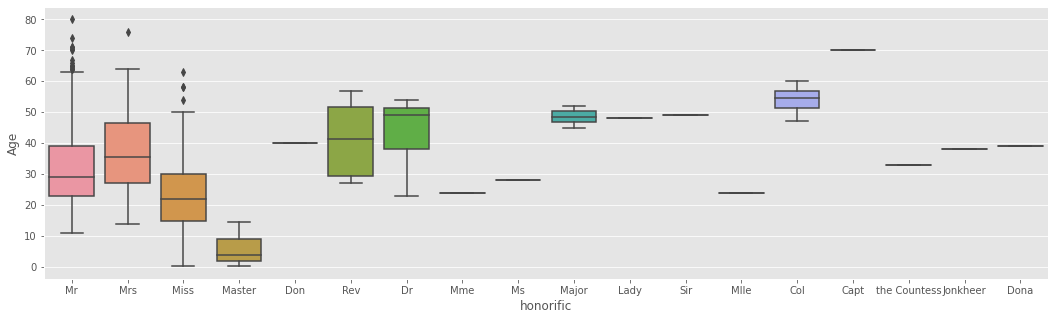

In [440]:
#敬称ごとの年齢の確認
#Mrsは結婚済みの女性、Missは結婚前の女性を示す。
plt.figure(figsize=(18,5))
sns.boxplot(x="honorific",y="Age",data=all_df)

In [441]:
all_df[["Age","honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [442]:
train_df=pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr,Karl Howell


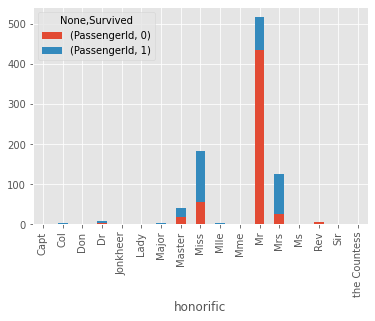

In [443]:
#敬称ごとの生存者の確認
honorific_df=train_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

In [444]:
#年齢について、敬称ごとの平均年齢で埋め合わせる。
#その前に、honorificごとに平均年齢を算出する。
honorific_age_mean=all_df[["honorific","Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns=["honorific","honorific_Age"]
honorific_age_mean

,honorific,honorific_Age
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [445]:
all_df=pd.merge(all_df,honorific_age_mean,on="honorific",how="left")
#loc→行列番号　iloc→行列名による指定
#補間処理
all_df.loc[(all_df["Age"].isnull()),"Age"]=all_df["honorific_Age"]
#余分に結合しているFare_meanを除去する。
all_df=all_df.drop("honorific_Age",axis=1)#axis=0は縦方向　axis=1は横方向
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


In [446]:
#問題なく、Ageの欠損値は除去されている。
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
dtype: int64

In [447]:
#家族がいるかいないかに着目する
all_df["family_name"]=all_df["Parch"]+all_df["SibSp"]
all_df["family_name"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_name, dtype: int64

In [448]:
all_df.loc[all_df["family_name"]==0,"alone"]=1
all_df["alone"].fillna(0,inplace=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,Mr,Owen Harris,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs,John Bradley (Florence Briggs Thayer),0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Laina,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,Mrs,Jacques Heath (Lily May Peel),0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,Mr,William Henry,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,0,Mr,Woolf,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,0,Dona,Fermina,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr,Simon Sivertsen,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,0,Mr,Frederick,1.0


In [449]:
#Cabinは客室番号で、かなり欠損値としては多い。
#客室番号によって、ある程度船の場所を特定できると思われるが、今回はそこまでは突き止めないでおく。
#カラムの削除を行っておく。
all_df_1=all_df.drop("Cabin",axis=1)#axis=0は縦方向　axis=1は横方向
all_df_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_name,honorific,name,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,Mr,Owen Harris,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,Mrs,John Bradley (Florence Briggs Thayer),0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,Miss,Laina,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,Mrs,Jacques Heath (Lily May Peel),0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,Mr,William Henry,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,S,0,Mr,Woolf,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,0,Dona,Fermina,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,0,Mr,Simon Sivertsen,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,S,0,Mr,Frederick,1.0


In [450]:
#Survivedは418件あるが、これはテストデータのものである。
#
all_df_1.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
family_name      0
honorific        0
name             0
alone            0
dtype: int64

In [451]:
train_survived=all_df_1[all_df_1["Survived"].notna()][["Survived"]]
train_survived

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [452]:
#目的変数の読み込みを行っておく。
submit_df=pd.read_csv("./drive/MyDrive/titanic/data/gender_submission.csv")
submit_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [453]:
test_survived=submit_df[["Survived"]]
test_survived

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [454]:
#目的変数の準備
goal_df=pd.concat([train_survived,test_survived],sort=False).reset_index(drop=True)
goal_df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,0.0
1305,1.0
1306,0.0
1307,0.0


In [455]:
all_df_2=pd.get_dummies(all_df_1,columns=["Sex"],drop_first=True)
all_df_2=pd.get_dummies(all_df_2,columns=["Embarked"])
all_df_2

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,family_name,honorific,name,alone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,Mr,Owen Harris,0.0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,Mrs,John Bradley (Florence Briggs Thayer),0.0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,Miss,Laina,1.0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,Mrs,Jacques Heath (Lily May Peel),0.0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,Mr,William Henry,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",32.252151,0,0,A.5. 3236,8.0500,0,Mr,Woolf,1.0,1,0,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,0,Dona,Fermina,1.0,0,1,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0,Mr,Simon Sivertsen,1.0,1,0,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",32.252151,0,0,359309,8.0500,0,Mr,Frederick,1.0,1,0,0,1


In [456]:
all_df_3=all_df_2.drop(["Survived","Name","honorific","name","Ticket"] , axis = 1)
all_df_3

,PassengerId,Pclass,Age,SibSp,Parch,Fare,family_name,alone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,1,0.0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0.0,0,1,0,0
2,3,3,26.000000,0,0,7.9250,0,1.0,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0.0,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,32.252151,0,0,8.0500,0,1.0,1,0,0,1
1305,1306,1,39.000000,0,0,108.9000,0,1.0,0,1,0,0
1306,1307,3,38.500000,0,0,7.2500,0,1.0,1,0,0,1
1307,1308,3,32.252151,0,0,8.0500,0,1.0,1,0,0,1


In [457]:
#train_test_splitによって、自動的にランダムシャッフルが行われるの結合しておく。
df=pd.concat([all_df_3,goal_df],axis=1)
df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,family_name,alone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,3,22.000000,1,0,7.2500,1,0.0,1,0,0,1,0.0
1,2,1,38.000000,1,0,71.2833,1,0.0,0,1,0,0,1.0
2,3,3,26.000000,0,0,7.9250,0,1.0,0,0,0,1,1.0
3,4,1,35.000000,1,0,53.1000,1,0.0,0,0,0,1,1.0
4,5,3,35.000000,0,0,8.0500,0,1.0,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,32.252151,0,0,8.0500,0,1.0,1,0,0,1,0.0
1305,1306,1,39.000000,0,0,108.9000,0,1.0,0,1,0,0,1.0
1306,1307,3,38.500000,0,0,7.2500,0,1.0,1,0,0,1,0.0
1307,1308,3,32.252151,0,0,8.0500,0,1.0,1,0,0,1,0.0


In [396]:
!pip install flaml

     |████████████████████████████████| 162 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 31.6 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [459]:
from sklearn.model_selection import train_test_split
# flaml
import flaml
from flaml import AutoML
from flaml.data import get_output_from_log
from flaml.ml import sklearn_metric_loss_score

# 評価指標
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [460]:
# ランダムシード値
RANDOM_STATE = 10

# 学習データと評価データの割合
TEST_SIZE = 0.2

# 学習データと評価データを作成
x_train, x_test, y_train, y_test = train_test_split(
    df.iloc[:,0:df.shape[1] - 1],
    df.iloc[:,df.shape[1] - 1],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
)

In [461]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1047, 12)
(1047,)
(262, 12)
(262,)


In [462]:
# flaml学習
automl = AutoML()
automl.fit(X_train=x_train, y_train=y_train)

[flaml.automl: 05-21 13:02:27] {2365} INFO - task = classification
[flaml.automl: 05-21 13:02:27] {2367} INFO - Data split method: stratified
[flaml.automl: 05-21 13:02:27] {2371} INFO - Evaluation method: cv
[flaml.automl: 05-21 13:02:27] {2448} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 05-21 13:02:27] {2561} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-21 13:02:27] {2853} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-21 13:02:27] {2984} INFO - Estimated sufficient time budget=754s. Estimated necessary time budget=17s.
[flaml.automl: 05-21 13:02:27] {3036} INFO -  at 0.1s,	estimator lgbm's best error=0.0939,	best estimator lgbm's best error=0.0939
[flaml.automl: 05-21 13:02:27] {2853} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-21 13:02:28] {3036} INFO -  at 0.2s,	estimator lgbm's best error=0.0939,	best estimator lgbm's best error=0.0939
[flaml.automl: 05-21 13:

In [463]:
#最善のモデルとハイパラメータなどを確認できる
print("Best ML leaner:", automl.best_estimator)
print("Best hyperparmeter config:", automl.best_config)
print("Best accuracy on validation data: {0:.4g}".format(1 - automl.best_loss))
print("Training duration of best run: {0:.4g} s".format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 46, 'num_leaves': 6, 'min_child_samples': 6, 'learning_rate': 0.09305689728188085, 'log_max_bin': 9, 'colsample_bytree': 0.850830895152115, 'reg_alpha': 0.22950070398182806, 'reg_lambda': 0.031605019771988783}
Best accuracy on validation data: 0.9381
Training duration of best run: 0.03282 s


In [465]:
automl_best={'n_estimators': 46, 'num_leaves': 6, 'min_child_samples': 6, 'learning_rate': 0.09305689728188085, 'log_max_bin': 9, 'colsample_bytree': 0.850830895152115, 'reg_alpha': 0.22950070398182806, 'reg_lambda': 0.031605019771988783}

In [466]:
import lightgbm as lgbm

In [468]:
lgb_train = lgbm.Dataset(
                 x_train, 
                 y_train)
#パラメータと学習データを与える
lgb = lgbm.train(automl_best, lgb_train)
pred=lgb.predict(x_test)
pred

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: log_max_bin
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 12
[LightGBM] [Info] Start training from score 0.374403


array([ 7.35440713e-02,  9.43498552e-01,  1.01179566e-01,  2.18013086e-01,
        8.68357436e-01,  1.91765782e-03,  1.55944990e-02,  7.87714794e-01,
        1.33191288e-01,  6.77435316e-01,  8.95073783e-01,  1.64835240e-01,
        1.31013512e-01,  3.55185648e-01,  2.88145564e-01,  1.91060112e-01,
        1.31013512e-01,  9.06742900e-01,  6.25451376e-01,  9.68736639e-01,
        8.18030988e-01,  3.17715896e-01,  1.38952818e-01,  9.69170377e-01,
        9.68736639e-01,  1.31013512e-01,  9.00921338e-01,  9.38095075e-01,
        2.10909505e-01,  8.30469797e-01,  1.31013512e-01,  3.68954251e-03,
        4.60914264e-02,  3.48343040e-01,  9.39156421e-01, -3.22906067e-04,
       -3.22906067e-04,  4.16014028e-02,  3.74484993e-01,  1.55944990e-02,
        3.68954251e-03,  9.15899908e-02,  9.38095075e-01,  6.82094793e-01,
        2.26848907e-01,  2.19163836e-01,  1.21172556e-01,  1.06014259e-01,
        3.65504454e-01,  9.52499571e-01,  6.11644626e-01,  1.00884060e+00,
        8.91030506e-01,  

In [469]:
# 評価
def calculate_scores(true, pred):

    scores = {}
    scores = pd.DataFrame(
        {
            "R2": r2_score(true, pred),
            "MAE": mean_absolute_error(true, pred),
            "MSE": mean_squared_error(true, pred),
            "RMSE": np.sqrt(mean_squared_error(true, pred)),
        },
        index=["scores"],
    )
    return scores

scores = calculate_scores(y_test, pred)
print(scores)

              R2       MAE       MSE     RMSE
scores  0.683598  0.184928  0.075224  0.27427
